In [1]:
import os

In [2]:
os.listdir("/kaggle/input/emotion-detection-fer")

['test', 'train']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import cv2
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
Class_name=os.listdir("/kaggle/input/emotion-detection-fer/train")
Class_name


['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

fearful


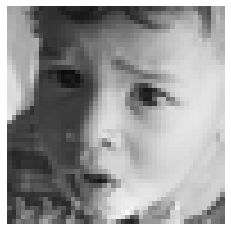


disgusted


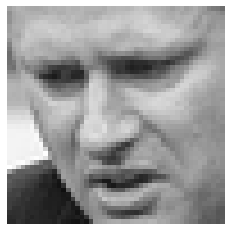


angry


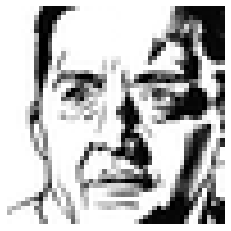


neutral


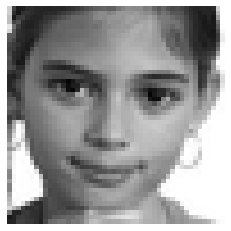


sad


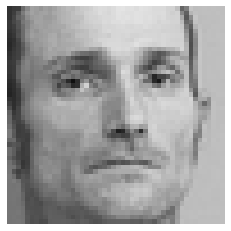


surprised


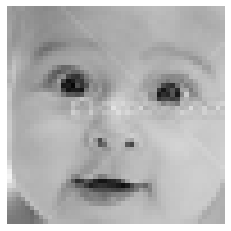


happy


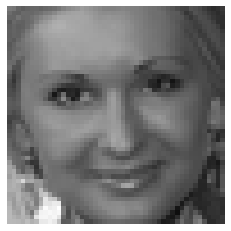

In [5]:
train_count=[]

for i in Class_name:
    path = os.path.join("/kaggle/input/emotion-detection-fer/train/",i)
    train_count.append(len(os.listdir(path)))
    img = cv2.imread(os.path.join(path, os.listdir(path)[0]))
    plt.imshow(img)
    plt.axis("off")
    print(i)
    plt.show()
    print()

<BarContainer object of 7 artists>

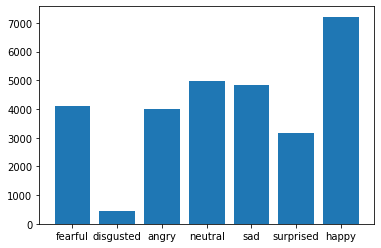

In [6]:
plt.bar(Class_name,train_count)

In [7]:
sum(train_count)

28709

In [8]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        
                                        )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                        )
train_generator = train_datagen.flow_from_directory(directory = "../input/emotion-detection-fer/train",
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
test_generator = test_datagen.flow_from_directory( directory = "../input/emotion-detection-fer/test",
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
train_count2=[]
for i in Class_name:
    train_count2.append(len(os.listdir("../input/emotion-detection-fer/train/"+i+"/")))

In [10]:
sum(train_count2)

28709

In [11]:
train_datagen

In [12]:
CNN= Sequential()
CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(128,(3,3),padding='same',activation='relu'))
CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten()) 

CNN.add(Dense(100,activation = 'relu'))

CNN.add(Dense(50,activation = 'relu'))

CNN.add(Dense(225,activation = 'relu'))

CNN.add(BatchNormalization())
CNN.add(Dropout(0.25))

CNN.add(Dense(7, activation='softmax'))



2022-12-30 17:35:58.266269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:35:58.267151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:35:58.271689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:35:58.272464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:35:58.273221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
CNN.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.0005), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [14]:
CNN.fit(
    x=train_generator,
    batch_size=32,
    epochs=55,
    verbose=1,
    validation_data=test_generator,
    shuffle=True
)

2022-12-30 17:36:02.842670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/55


2022-12-30 17:36:05.326250: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


898/898 [==============================] - 181s 190ms/step - loss: 1.9376 - accuracy: 0.2371 - val_loss: 1.7643 - val_accuracy: 0.2981
Epoch 2/55
898/898 [==============================] - 54s 60ms/step - loss: 1.7041 - accuracy: 0.3334 - val_loss: 1.5698 - val_accuracy: 0.3940
Epoch 3/55
898/898 [==============================] - 52s 58ms/step - loss: 1.4789 - accuracy: 0.4291 - val_loss: 1.3039 - val_accuracy: 0.5026
Epoch 4/55
898/898 [==============================] - 53s 59ms/step - loss: 1.3439 - accuracy: 0.4893 - val_loss: 1.2780 - val_accuracy: 0.5063
Epoch 5/55
898/898 [==============================] - 53s 59ms/step - loss: 1.2703 - accuracy: 0.5177 - val_loss: 1.1574 - val_accuracy: 0.5678
Epoch 6/55
898/898 [==============================] - 53s 59ms/step - loss: 1.2250 - accuracy: 0.5352 - val_loss: 1.1644 - val_accuracy: 0.5539
Epoch 7/55
898/898 [==============================] - 53s 58ms/step - loss: 1.1923 - accuracy: 0.5489 - val_loss: 1.1285 - val_accuracy: 0.5765
E